In [20]:
from data.mnist import load_mnist

In [24]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=True)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
from PIL import Image
import numpy as np

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) 
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=True)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


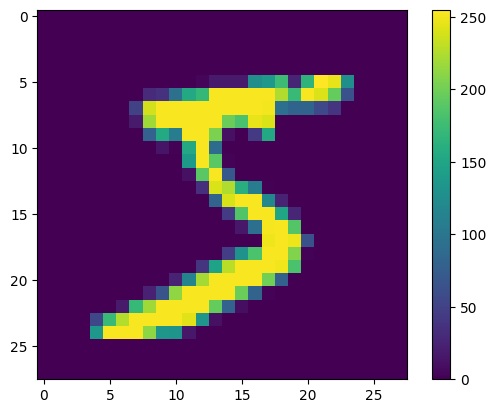

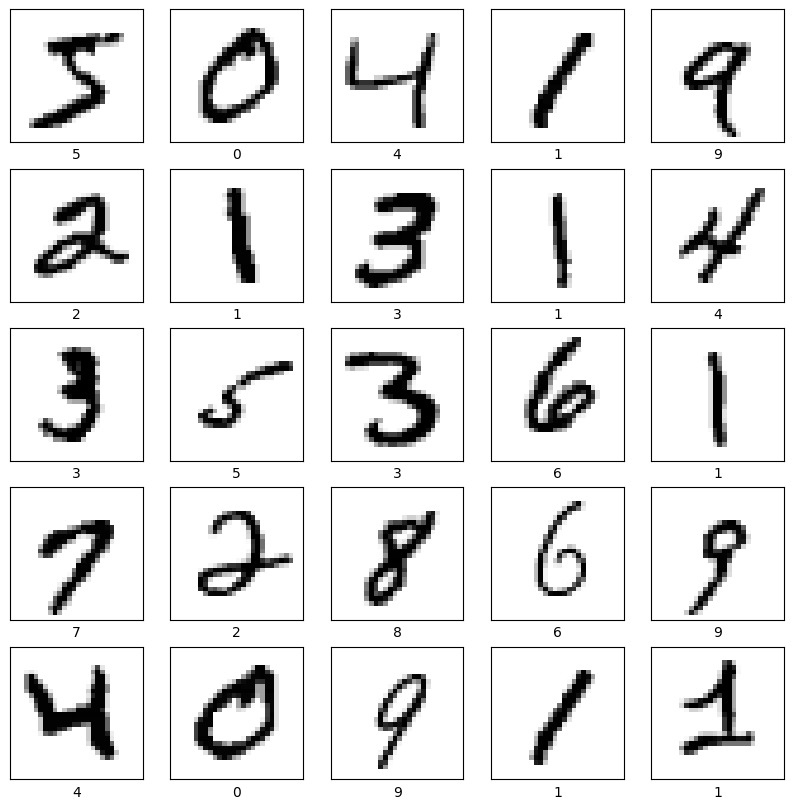

In [34]:
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=True)

plt.figure()
plt.imshow(x_train[0].reshape(28,28))
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(t_train[i])
plt.show()

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [44]:
from data.mnist import load_mnist
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('data/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [42]:
len(x)

10000

In [54]:
import time

In [59]:
start = time.time()
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print('Accuracy :' + str(float(accuracy_cnt) / len(x)))
print(time.time() - start)

Accuracy :0.9352
0.9192051887512207


In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if (p == t[i]) & (y[p] > 0.8):  # 정답 확률이 0.8이상만 추출
        accuracy_cnt += 1

print('Accuracy :' + str(float(accuracy_cnt) / len(x)))

Accuracy :0.8363


In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if (p == t[i]) & (y[p] > 0.8):  # 정답 확률이 0.8이상만 추출
        accuracy_cnt += 1

print('Accuracy :' + str(float(accuracy_cnt) / len(x)))

In [60]:
# batch 사용

start = time.time()
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)  # 확률벡터가 아닌 행렬이 나오게 됨
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i + batch_size])

print('Accuracy :' + str(float(accuracy_cnt) / len(x)))
print(time.time() - start)

Accuracy :0.9352
0.3699476718902588


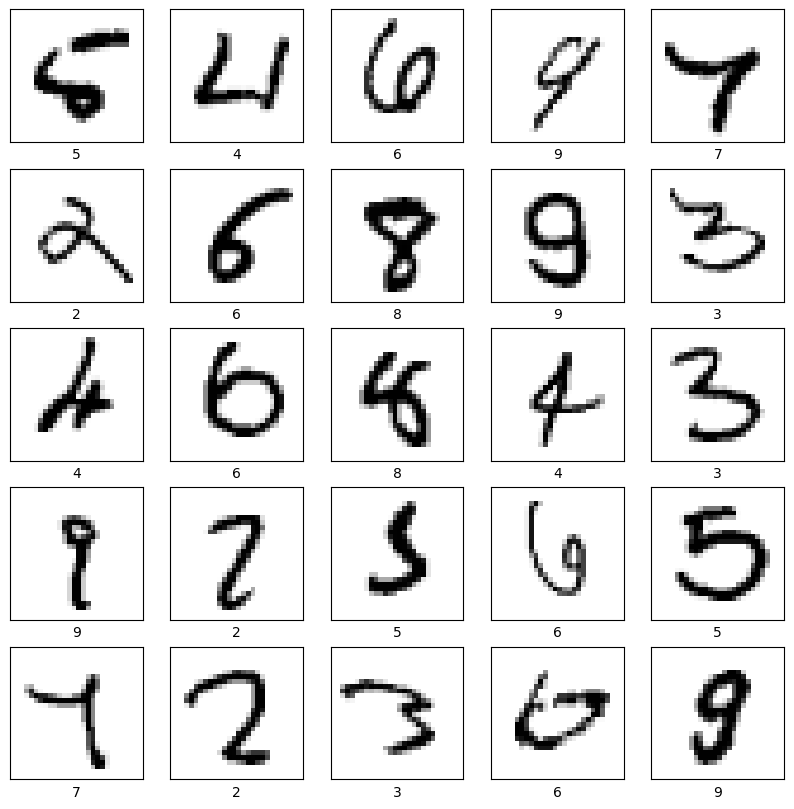

In [62]:
# 틀린 것들 찾기

x, t = get_data()
network = init_network()
error = []
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p != t[i]:
        error.append(i)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])  # 가로 눈금 없애기
    plt.yticks([])  # 세로 눈금 없애기
    plt.imshow(x[error[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(t[error[i]])
plt.show()